<a href="https://colab.research.google.com/github/AnalyticsKnight/yemoonsaBigdata/blob/dev/src/P3_C4_PythonExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 4. 빅데이터분석기사 7회**

#### 000 소스 및 데이터 동기화

In [ ]:
!git clone https://github.com/AnalyticsKnight/yemoonsaBigdata/

Cloning into 'yemoonsaBigdata'...
remote: Enumerating objects: 656, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 656 (delta 140), reused 198 (delta 110), pack-reused 363
Receiving objects: 100% (656/656), 10.83 MiB | 14.69 MiB/s, done.
Resolving deltas: 100% (325/325), done.


In [ ]:
path = '/content/yemoonsaBigdata/datasets/Part3/ex7/'

## 1. 작업형 제1유형

### (1) 첫 번째 문제

- 주어진 데이터 세트는 학생들의 과목별 점수 데이터다. 수강과목은 통계(Statistics), 데이터사이언스(DataScience), 머신러닝(MachineLearning), 교양영어(EnglishLiterature) 이다. 학생들은 이중 3과목을 선택하여 들었으며 이에 대한 점수를 받았다. 가장 많은 학생이 들었던 과목을 구하고 결측치를 제거한 후, 해당 과목의 점수를 표준화하여 가장 높은 점수를 소수 둘째 자리로 반올림하여 구하라.

#### 611-01 데이터 불러오기

In [ ]:
#데이터 불러오기
import pandas as pd

file = path + '07.01.01-students_scores.csv'

df = pd.read_csv(file) #, encoding='cp949'
print(df.head())

   student id  Statistics  DataScience  MachineLearning  EnglishLiterature
0           1         NaN         54.0             94.0               62.0
1           2        76.0         16.0             80.0                NaN
2           3         6.0          NaN             68.0               45.0
3           4        84.0         30.0             76.0                NaN
4           5         NaN         53.0             33.0               90.0


#### 611-02 데이터 정보 확인하기

In [ ]:
#데이터 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   student id         1000 non-null   int64  
 1   Statistics         773 non-null    float64
 2   DataScience        709 non-null    float64
 3   MachineLearning    769 non-null    float64
 4   EnglishLiterature  749 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [ ]:
#수치형 데이터 기술통계 확인하기
print(df.describe())

        student id  Statistics  DataScience  MachineLearning  \
count  1000.000000  773.000000   709.000000       769.000000   
mean    500.500000   49.648124    48.503526        48.884265   
std     288.819436   28.413314    28.985951        29.069571   
min       1.000000    0.000000     0.000000         0.000000   
25%     250.750000   27.000000    23.000000        24.000000   
50%     500.500000   49.000000    49.000000        48.000000   
75%     750.250000   74.000000    72.000000        74.000000   
max    1000.000000   99.000000    99.000000        99.000000   

       EnglishLiterature  
count         749.000000  
mean           47.867824  
std            28.229671  
min             0.000000  
25%            24.000000  
50%            47.000000  
75%            73.000000  
max            99.000000  


#### 611-03 가장 많이 들은 과목 추출해서 결측치 제거하기

In [ ]:
#과목별 수강 카운트 하기
#student_id 칼럼을 제외한 df1 생성
df1 = df[['Statistics', 'DataScience', 'MachineLearning','EnglishLiterature']]

subject_counts = df1.count()
print(subject_counts)

Statistics           773
DataScience          709
MachineLearning      769
EnglishLiterature    749
dtype: int64


In [ ]:
#가장 많이 들은 과목이름 뽑아오기
most_popular_subject = subject_counts.idxmax()
print(most_popular_subject)

Statistics


In [ ]:
#결측치 제거하기
mps_df = df1[most_popular_subject].dropna()
print(mps_df.info())

<class 'pandas.core.series.Series'>
Int64Index: 773 entries, 1 to 998
Series name: Statistics
Non-Null Count  Dtype  
--------------  -----  
773 non-null    float64
dtypes: float64(1)
memory usage: 12.1 KB
None


#### 611-04 과목 점수 표준화 하기

* 표준화: 데이터의 분포를 평균이 0 이고 분산이 1 인  표준 정규 분포로 변환하는 것

In [ ]:
#과목점수 표준화
#1.scipy.stats 활용
import scipy.stats as stats
mps_score = stats.zscore(mps_df)
print(mps_score)

1      0.928049
2     -1.537180
3      1.209789
5     -1.114570
6     -0.832829
         ...   
994    0.540656
995   -0.586306
996    0.012392
997    0.963266
998   -0.234131
Name: Statistics, Length: 773, dtype: float64


In [ ]:
#과목점수 표준화
#2.sklearn 활용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(mps_df.values.reshape(-1,1))

mps_score = scaler.transform(mps_df.values.reshape(-1,1))
print(mps_score[:5])

[[ 0.92804863]
 [-1.53718021]
 [ 1.20978907]
 [-1.11456955]
 [-0.83282911]]


In [ ]:
#과목점수 표준화
#3. 계산하기 ((x-mean(x))/std(x))

mps_score = (mps_df - mps_df.mean()) / mps_df.std()
print(mps_score[:5])

1    0.927448
2   -1.536186
3    1.209006
5   -1.113848
6   -0.832290
Name: Statistics, dtype: float64


####611-05 표준화 점수 중 최대값 확인

In [ ]:
#표준화 점수 중 최대값 출력하기
result = round(max(mps_score),2)
print(result)

1.74


In [ ]:
## 전체 풀이 코드

import pandas as pd

file = path + '07.01.01-students_scores.csv'

df = pd.read_csv(file) #, encoding='cp949'
#print(df.head())

#데이터 정보 확인하기
#print(df.info())

#과목별 수강 카운트 하기
#student_id 칼럼을 제외한 df1 생성
df1 = df[['Statistics', 'DataScience', 'MachineLearning','EnglishLiterature']]

subject_counts = df1.count()
#print(subject_counts)

#가장 많이 들은 과목이름 뽑아오기
most_popular_subject = subject_counts.idxmax()
#print(most_popular_subject)

#결측치 제거하기
mps_df = df1[most_popular_subject].dropna()
#print(mps_df.info())

#과목점수 표준화
#1.scipy.stats 활용
import scipy.stats as stats
mps_score = stats.zscore(mps_df)
#print(mps_score)


#과목점수 표준화
#2.sklearn 활용
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(mps_df.values.reshape(-1,1))

# mps_score = scaler.transform(mps_df.values.reshape(-1,1))
#print(mps_score[:5])


#과목점수 표준화
#3. 계산하기 ((x-mean(x))/std(x))
#mps_score = (mps_df - mps_df.mean()) / mps_df.std()
#print(mps_score[:5])


#표준화 점수 중 최대값 확인
result = round(max(mps_score),2)
print(result)


1.74


### (2) 두 번째 문제

- 주어진 데이터 세트는 물고기 데이터로 무게(Weight), 길이(Length), 높이(Height), 폭(Width), 지느러미크기(FinSize)로 구성되어 있다. 종속변수는 무게이며 나머지는 독립변수다. 종속변수와 가장 높은 상관관계를 보이는 독립변수를 찾으시오.

#### 612-01 데이터 불러오기

In [ ]:
#데이터 불러오기
import pandas as pd

file = path + '07.01.02-fish_weight_data.csv'
df = pd.read_csv(file)
print(df.head())

   id  Length  Height  Width  FinSize  Weight
0   1   63.91   28.72   3.46    18.22  194.32
1   2   77.22   14.45   7.12    15.71  194.59
2   3   68.22   30.73   4.09     7.33  191.24
3   4   63.59   38.68   2.21     2.54  194.23
4   5   53.89   13.71   0.73     8.74  131.82


#### 612-02 데이터정보 확인하기

In [ ]:
#데이터 정보 확인하기
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       100 non-null    int64  
 1   Length   100 non-null    float64
 2   Height   100 non-null    float64
 3   Width    100 non-null    float64
 4   FinSize  100 non-null    float64
 5   Weight   100 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB
None


In [ ]:
#기술통계확인하기
print(df.describe())

               id      Length      Height       Width     FinSize      Weight
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean    50.500000   57.823500   23.482600    5.341300    9.982500  162.629800
std     29.011492   23.180334    9.733342    2.880252    5.435566   48.828988
min      1.000000   20.380000    5.410000    0.630000    1.220000   69.240000
25%     25.750000   36.465000   15.345000    2.767500    5.635000  124.852500
50%     50.500000   57.395000   25.135000    5.295000    9.675000  165.770000
75%     75.250000   74.762500   30.550000    7.990000   14.767500  196.512500
max    100.000000   99.070000   39.960000    9.910000   19.230000  253.350000


#### 612-03 상관계수 계산

In [ ]:
#ID변수 제거하기
df1 = df.copy()
df1 = df1.drop('id', axis=1)

print(df1)

    Length  Height  Width  FinSize  Weight
0    63.91   28.72   3.46    18.22  194.32
1    77.22   14.45   7.12    15.71  194.59
2    68.22   30.73   4.09     7.33  191.24
3    63.59   38.68   2.21     2.54  194.23
4    53.89   13.71   0.73     8.74  131.82
..     ...     ...    ...      ...     ...
95   34.66   22.17   2.63    19.22  124.89
96   66.92   12.96   1.43     7.75  152.90
97   21.61   13.90   8.69     7.78   77.97
98   86.32    7.03   9.74     1.31  193.44
99   20.38   20.20   9.63     4.52   80.69

[100 rows x 5 columns]


In [ ]:
#상관계수 구하기
corr_matrix = df1.corr()

print(type(corr_matrix), '\\')
print(corr_matrix)

<class 'pandas.core.frame.DataFrame'> \
           Length    Height     Width   FinSize    Weight
Length   1.000000 -0.066048 -0.036361  0.021882  0.947420
Height  -0.066048  1.000000 -0.124041 -0.062081  0.222426
Width   -0.036361 -0.124041  1.000000 -0.114974 -0.046809
FinSize  0.021882 -0.062081 -0.114974  1.000000  0.107433
Weight   0.947420  0.222426 -0.046809  0.107433  1.000000


#### 612-05 가장 높은 상관관계를 보이는 변수 찾기

In [ ]:
#Weight를 중심으로 상관관계 데이터 가져오기
corr_weight = corr_matrix['Weight'].drop('Weight')
print(corr_weight)

Length     0.947420
Height     0.222426
Width     -0.046809
FinSize    0.107433
Name: Weight, dtype: float64


In [ ]:
#가장 높은 상관관계를 보이는 변수 찾기
result = corr_weight.idxmax()
print(result)

Length


In [ ]:
## 전체 풀이 코드
#데이터 불러오기
import pandas as pd

file = path + '07.01.02-fish_weight_data.csv'
df = pd.read_csv(file)
#print(df.head())
#데이터 정보 확인하기
#print(df.info())

#ID변수 제거하기
df1 = df.copy()
df1 = df1.drop('id', axis=1)

#print(df1)

#상관계수 구하기
corr_matrix = df1.corr()

#print(type(corr_matrix), '\\')
#print(corr_matrix)

#Weight를 중심으로 상관관계 데이터 가져오기
corr_weight = corr_matrix['Weight'].drop('Weight')
#print(corr_weight)


#가장 높은 상관관계를 보이는 변수 찾기
result = corr_weight.idxmax()
print(result) # 최종 결과값만 print되도록 해야 합니다.


Length


### (3) 세 번째 문제

-  주어진 데이터 세트는 아파트 가격 데이터다. 아파트 가격을 결정하는 10개의 독립변수와 1개의 종속변수가 있다. 각 독립변수의 이상치를 사분위수를 기준으로 측정하고 이상치가 가장 많은 독립변수를 구하시오. 이때 결측치를 먼저 제거한 후 이상치를 구하시오. (이상치는  (1Q-1.5IQR) 보다 작거나 (3Q+1.5IQR)보다 큰 값이며, IQR은 Q3에서 Q1을 뺀 값임)

#### 613-01 데이터 불러오기

In [ ]:
#데이터 불러오기
import pandas as pd

file = path + '07.01.03-apartment_prices_dataset.csv'
df = pd.read_csv(file)
print(df.head())

         Size  Bedrooms  Bathrooms  Floor  Age  DistanceToCenter  \
0  132.322026         2          2     12   23          5.916263   
1  157.278405         2          2     16    1          4.765030   
2  131.732477         1          1     18   18         16.529690   
3  113.548220         3          1     13   43         15.602367   
4  146.884117         2          1     13    7          9.115029   

   NearbySchools  NearbyParks  PublicTransport  SafetyIndex        Price  
0            7.0          1.0              5.0           54  204546.3152  
1            9.0          4.0              5.0           44  224020.0640  
2            1.0          2.0              3.0           94  110609.5388  
3            3.0          1.0              4.0           75  143313.9356  
4            6.0          3.0              1.0           89  162672.0736  


#### 613-02 데이터 정보 확인하기

In [ ]:
#데이터  정보 확인하기
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Size              735 non-null    float64
 1   Bedrooms          735 non-null    int64  
 2   Bathrooms         735 non-null    int64  
 3   Floor             735 non-null    int64  
 4   Age               735 non-null    int64  
 5   DistanceToCenter  735 non-null    float64
 6   NearbySchools     735 non-null    float64
 7   NearbyParks       735 non-null    float64
 8   PublicTransport   735 non-null    float64
 9   SafetyIndex       735 non-null    int64  
 10  Price             735 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 63.3 KB
None


In [ ]:
#기술통계 확인하기
print(df.describe())

             Size    Bedrooms   Bathrooms       Floor         Age  \
count  735.000000  735.000000  735.000000  735.000000  735.000000   
mean   124.582571    2.571429    1.489796    9.840816   26.025850   
std     47.019547    1.228632    0.529348    5.998226   17.277685   
min     21.205359    0.000000    0.000000    0.000000    0.000000   
25%     87.131283    2.000000    1.000000    5.000000   12.000000   
50%    121.907682    3.000000    1.000000   10.000000   25.000000   
75%    160.456029    4.000000    2.000000   15.000000   38.000000   
max    563.615954   11.000000    5.000000   54.000000  130.000000   

       DistanceToCenter  NearbySchools  NearbyParks  PublicTransport  \
count        735.000000     735.000000   735.000000       735.000000   
mean          10.016021       4.448667     2.049735         5.195673   
std            5.481185       3.176804     1.487053         3.001572   
min            0.313919       0.000000     0.000000         0.332843   
25%            5.3

#### 613-03 결측치 제거하기

In [ ]:
#결측치 제거하기
df1 = df.dropna()

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Size              735 non-null    float64
 1   Bedrooms          735 non-null    int64  
 2   Bathrooms         735 non-null    int64  
 3   Floor             735 non-null    int64  
 4   Age               735 non-null    int64  
 5   DistanceToCenter  735 non-null    float64
 6   NearbySchools     735 non-null    float64
 7   NearbyParks       735 non-null    float64
 8   PublicTransport   735 non-null    float64
 9   SafetyIndex       735 non-null    int64  
 10  Price             735 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 63.3 KB


#### 613-04 독립변수별 이상치 구하기

In [ ]:
#이상치 구하기
cols = df1.columns[:-1]
o_cnt_per_var = {}

for c in cols:
  Q1, Q3 = df1[c].quantile([0.25, 0.75])
  IQR = Q3-Q1
  o_cnt = ((df1[c]< (Q1-1.5*IQR)) | (df1[c]>(Q3+1.5 * IQR))).sum()

  o_cnt_per_var[c] = o_cnt

print(o_cnt_per_var)

{'Size': 1, 'Bedrooms': 3, 'Bathrooms': 2, 'Floor': 4, 'Age': 15, 'DistanceToCenter': 1, 'NearbySchools': 5, 'NearbyParks': 4, 'PublicTransport': 5, 'SafetyIndex': 3}


#### 613-05 이상치가 가장 많은 변수 구하기

In [ ]:
#이상치가 가장 많은 변수 구하기
result = max(o_cnt_per_var, key=o_cnt_per_var.get) #get key with max value
print(result)

Age


In [ ]:
#전체코드
#데이터 불러오기
import pandas as pd

file = path + '07.01.03-apartment_prices_dataset.csv'
df = pd.read_csv(file)
#print(df.head())

#데이터  확인하기
#print(df.head())

#데이터 정보 확인하기
#df.info()

#결측치 제거하기
df1 = df.dropna()
#print(df1.info())

#이상치 구하기
cols = df1.columns[:-1]
o_cnt_per_var = {}

for c in cols:
  Q1, Q3 = df1[c].quantile([0.25, 0.75])
  IQR = Q3-Q1
  o_cnt = ((df1[c]< (Q1-1.5*IQR)) | (df1[c]>(Q3+1.5 * IQR))).sum()

  o_cnt_per_var[c] = o_cnt

#print(o_cnt_per_var)

#이상치가 가장 많은 변수 구하기
result = max(o_cnt_per_var, key=o_cnt_per_var.get) #get key with max value
print(result)

Age


## 2. 작업형 제2유형

* 회사에서 신규 영업지점을 설립하려고 한다. 기존 영업지점 데이터를 이용하여 신규 영업지점을 설립할 경우 달성 가능한 매출을 예측하여 의사결정에 사용할 계획이다. 주어진 훈련 데이터 세트를 활용하여 매출 예측 머신러닝 모델을 구축하고, 테스트 데이터를 대상으로 매출을 예측한 결과를 CSV 파일로 제출하시오.

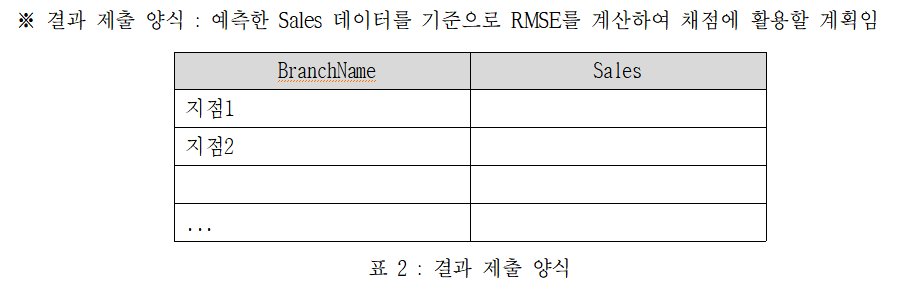

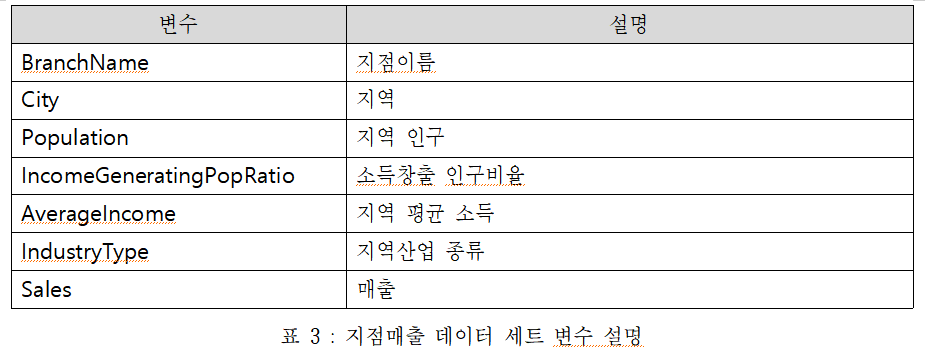

### (1) 사전 준비

#### 621-01. 데이터 불러오기

In [ ]:
# 출력을 원하실 경우 print() 함수 활용
# 예시) print(df.head())

# getcwd(), chdir() 등 작업 폴더 설정 불필요
# 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

# 데이터 파일 읽기 예제
import pandas as pd

train_file = '07.02.01-sales_train_dataset.csv'
X_test_file = '07.02.02-sales_test_dataset_x.csv'

train = pd.read_csv(path + train_file)
X_test = pd.read_csv(path + X_test_file)

# 사용자 코딩

# 답안 제출 참고
# 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
# pd.DataFrame({'index': X_test.index, 'y_pred': pred}).to_csv('003000000.csv', index=False)

In [ ]:
print(train.head())

  BranchName City  Population  IncomeGeneratingPopRatio  AverageIncome  \
0      지점106   대전     1961994                  0.201855        5104676   
1       지점69   수원     1999348                  0.609039        6175887   
2      지점480   광주     1736191                  0.684106        4935993   
3      지점400   서울     1411974                  0.488642        6387483   
4      지점435   수원     1599608                  0.231685        6113313   

  IndustryType      Sales  
0           농업  256900147  
1         서비스업  185564838  
2           농업  265883549  
3           어업  130738595  
4           어업  354354259  


### (2) 데이터 전처리

#### 622-01. 데이터 확인하기

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BranchName                700 non-null    object 
 1   City                      700 non-null    object 
 2   Population                700 non-null    int64  
 3   IncomeGeneratingPopRatio  700 non-null    float64
 4   AverageIncome             700 non-null    int64  
 5   IndustryType              700 non-null    object 
 6   Sales                     700 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB
None


In [ ]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BranchName                300 non-null    object 
 1   City                      300 non-null    object 
 2   Population                300 non-null    int64  
 3   IncomeGeneratingPopRatio  300 non-null    float64
 4   AverageIncome             300 non-null    int64  
 5   IndustryType              300 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 14.2+ KB
None


#### 622-02. 변수별 결측치 수 확인


In [ ]:
print(train.isnull().sum())

BranchName                  0
City                        0
Population                  0
IncomeGeneratingPopRatio    0
AverageIncome               0
IndustryType                0
Sales                       0
dtype: int64


In [ ]:
print(X_test.isnull().sum())

BranchName                  0
City                        0
Population                  0
IncomeGeneratingPopRatio    0
AverageIncome               0
IndustryType                0
dtype: int64


#### 622-03. 변수 구분

In [ ]:
print(train.columns)

Index(['BranchName', 'City', 'Population', 'IncomeGeneratingPopRatio',
       'AverageIncome', 'IndustryType', 'Sales'],
      dtype='object')


In [ ]:
# id: 불필요한 변수
# Age, Annual Salary: 수치형 변수
# Gender, Education, Occupation Type, Residence Type: 범주형 변수
# Preferred Metaverse Type: 종속 변수

COL_DEL = ['BranchName']
COL_NUM = ['Population', 'IncomeGeneratingPopRatio', 'AverageIncome']
COL_CAT = ['City', 'IndustryType']
COL_Y = ['Sales']

### (3) 데이터 모형 구축

#### 623-01. 데이터 분할

In [ ]:
#데이터 분할을 위해 X_train, y_train 데이터 별도 생성
X_train = train[COL_CAT + COL_NUM]
y_train = train[COL_Y]

print(X_train.head())
print('*'*100)
print(y_train.head())

  City IndustryType  Population  IncomeGeneratingPopRatio  AverageIncome
0   대전           농업     1961994                  0.201855        5104676
1   수원         서비스업     1999348                  0.609039        6175887
2   광주           농업     1736191                  0.684106        4935993
3   서울           어업     1411974                  0.488642        6387483
4   수원           어업     1599608                  0.231685        6113313
****************************************************************************************************
       Sales
0  256900147
1  185564838
2  265883549
3  130738595
4  354354259


In [ ]:
#데이터 분할 훈련(7) vs 검증(3)
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train
                                            , y_train.values.ravel()
                                            , test_size=0.3)

In [ ]:
print(X_tr.head())
print('*'*100)
print(y_tr[:2])

    City IndustryType  Population  IncomeGeneratingPopRatio  AverageIncome
317   인천           농업     1118281                  0.327120        4370547
275   인천           농업     1752636                  0.212274        4721519
86    대전           농업     1295345                  0.452954        6941631
623   울산           농업     1419220                  0.241582        6499339
634   대전           어업     1859653                  0.260194        4897285
****************************************************************************************************
[280412137 461681286]


#### 623-02. 수치형 변수 - 데이터 스케일링

In [ ]:
print(X_tr.describe())

         Population  IncomeGeneratingPopRatio  AverageIncome
count  4.900000e+02                490.000000   4.900000e+02
mean   1.744647e+06                  0.452454   4.990532e+06
std    7.089757e+05                  0.144703   1.163869e+06
min    5.059120e+05                  0.200184   3.001803e+06
25%    1.155468e+06                  0.327846   3.941114e+06
50%    1.741807e+06                  0.458793   5.007803e+06
75%    2.341254e+06                  0.583633   6.013594e+06
max    2.992882e+06                  0.699099   6.990697e+06


In [ ]:
#표준화 수
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_tr[COL_NUM])

X_tr[COL_NUM]   = scaler.transform(X_tr[COL_NUM])
X_val[COL_NUM]  = scaler.transform(X_val[COL_NUM])
X_test[COL_NUM] = scaler.transform(X_test[COL_NUM])

In [ ]:
print(X_tr[COL_NUM].head())

     Population  IncomeGeneratingPopRatio  AverageIncome
317   -0.884383                 -0.867034      -0.533238
275    0.011280                 -1.661512      -0.231373
86    -0.634382                  0.003456       1.678103
623   -0.459479                 -1.458764       1.297696
634    0.162380                 -1.330015      -0.080200


#### 623-03. 범주형 변수 - 데이터 인코딩

In [ ]:
#범주형 변수 인코딩
from sklearn.preprocessing import LabelEncoder

X = pd.concat([X_train[COL_CAT], X_test[COL_CAT]])


for col in COL_CAT:
  le = LabelEncoder()
  le.fit(X[col])
  X_tr[col] = le.transform(X_tr[col])
  X_val[col] = le.transform(X_val[col])
  X_test[col] = le.transform(X_test[col])

  # 각 변수의 클래스 확인
  print(col)
  print(le.classes_)
  print('\n')

City
['고양' '광주' '대구' '대전' '부산' '서울' '수원' '용인' '울산' '인천']


IndustryType
['농업' '서비스업' '어업' '제조업']




In [ ]:
print(X_tr[COL_CAT].head())

     City  IndustryType
317     9             0
275     9             0
86      3             0
623     8             0
634     3             2


#### 623-04. 모형 학습


In [ ]:
## 1) 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor(random_state=123)
modelRF.fit(X_tr, y_tr)

## 2) XGBoost
from xgboost import XGBRegressor
modelXGB = XGBRegressor(objective='reg:squarederror', random_state=123)
modelXGB.fit(X_tr, y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

### (4) 데이터 모형 평가

#### 624-01. 검증 데이터로 예측값 생성

In [ ]:
y_val_predRF = modelRF.predict(X_val)
y_val_predXGB = modelXGB.predict(X_val)

#### 624-02. 평가지표 구하기

In [ ]:
## 답안 채점 기준인 rmse 사용 (mean_squared_error를 사용하여 검증해도 됩니다.)
from sklearn.metrics import mean_squared_error
import numpy as np

def cal_rmse(actual, pred):
  return np.sqrt(mean_squared_error(actual, pred))

scoreRF = cal_rmse(y_val, y_val_predRF)
scoreXGB = cal_rmse(y_val, y_val_predXGB)

print('Random Forest: \t', scoreRF)
print('XGBoost: \t', scoreXGB)

Random Forest: 	 119184360.22296709
XGBoost: 	 133677202.64363734


#### 624-03. 학습, 검증 성능 확인 함수

In [ ]:
#성능 스코어 함수 생성
def get_scores(model, X_tr, X_val, y_tr, y_val):

  y_tr_pred = model.predict(X_tr)
  y_val_pred = model.predict(X_val)
  tr_score = cal_rmse(y_tr, y_tr_pred)
  val_score = cal_rmse(y_val, y_val_pred)

  return f'train: {round(tr_score, 4)}, valid: {round(val_score, 4)}'

In [ ]:
#모델별 성능 출력
print('Random Forest \t-', get_scores(modelRF, X_tr, X_val, y_tr, y_val))
print('XGBoost \t-', get_scores(modelXGB, X_tr, X_val, y_tr, y_val))

Random Forest 	- train: 48211566.4093, valid: 119184360.223
XGBoost 	- train: 3776956.8938, valid: 133677202.6436


#### 624-04. 하이퍼 파라미터 튜닝

In [ ]:
modelXGB2 = XGBRegressor(objective='reg:squarederror', n_estimators=50, max_depth=5, min_child_weight=2, random_state=123)
modelXGB2.fit(X_tr, y_tr)

modelXGB3 = XGBRegressor(objective='reg:squarederror', n_estimators=50, max_depth=10, min_child_weight=2, random_state=123)
modelXGB3.fit(X_tr, y_tr)

modelXGB4 = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, min_child_weight=1, random_state=123)
modelXGB4.fit(X_tr, y_tr)

modelXGB5 = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=10, min_child_weight=2, random_state=123)
modelXGB5.fit(X_tr, y_tr)

print('XGBoost2 \t-', get_scores(modelXGB2, X_tr, X_val, y_tr, y_val))
print('XGBoost3 \t-', get_scores(modelXGB3, X_tr, X_val, y_tr, y_val))
print('XGBoost4 \t-', get_scores(modelXGB4, X_tr, X_val, y_tr, y_val))
print('XGBoost5 \t-', get_scores(modelXGB5, X_tr, X_val, y_tr, y_val))

XGBoost2 	- train: 39448692.6822, valid: 132920321.8334
XGBoost3 	- train: 1653578.0688, valid: 132890142.1939
XGBoost4 	- train: 14414465.2569, valid: 131102686.1772
XGBoost5 	- train: 25723.7807, valid: 132990031.2446


#### 624-05. 최종 결과값 생성

In [ ]:
pred = modelXGB4.predict(X_test[COL_CAT+COL_NUM])
result = pd.DataFrame({'BranchName': X_test.BranchName, 'Sales': pred})
print(result.head())

  BranchName        Sales
0      지점994  390222784.0
1      지점860  349825600.0
2      지점299  320633088.0
3      지점554  287619488.0
4      지점673  271539904.0


In [ ]:
## 최종 결과 확인 후 to_csv 함수로 제출
result.to_csv('003000000.csv', index=False)

## 3. 작업형 제3유형

### (1) 첫 번째 문제

-  키(Height), 몸무게(Weight), 발사이즈(ShoeSize)를 이용하여 남녀(Sex) 성별을 분류하는 로지스틱 회귀모형을 만들고자 한다. 주어진 데이터세트를 이용하여 로지스틱 회귀모형을 만들고 아래의 질문에 답하시오. 단, 주어진 데이터세트의 2/3를 훈련용으로, 1/3을 테스트용으로 분할하여 작업하시오.





> (1) 훈련용 데이터를 이용하여 'Height', 'Weight', 'ShoeSize'를 설명변수로 사용하는 로지스틱 회귀 모형을 만들고 Weight의 오즈비를 계산하시오. <br>
> (2) 모델의 로짓우도(log-likelihood)를 구하시오. <br>
> (3) 위 (2)에서 만든 모델로 평가용 데이터를 예측한 결과와 실제값의 오차율을 구하시오. (소수 네자리에서 반올림)


#### 631-01 데이터 불러오기

In [ ]:
#libray import
import pandas as pd
import statsmodels.api as sm

In [ ]:
#file 읽어오기
file = path + '07.03.01-gender_prediction_dataset.csv'
df = pd.read_csv(file)
print(df.head())

   Height  Weight  ShoeSize  Gender
0   177.6    59.0     274.0    Male
1   168.0    49.4     238.0  Female
2   157.4    69.8     248.0  Female
3   177.9    62.3     278.0    Male
4   156.0    55.3     232.0  Female


#### 631-02 Gender를 이진 변수로 변환하기

In [ ]:
df1 = df.copy()

In [ ]:
#Gender를 이진 변수로 변환하기
df1['Gender'] = df1['Gender'].map({'Male':1, 'Female':0})

print(df1.head())
print('*'*100)
print(df1['Gender'].unique())

   Height  Weight  ShoeSize  Gender
0   177.6    59.0     274.0       1
1   168.0    49.4     238.0       0
2   157.4    69.8     248.0       0
3   177.9    62.3     278.0       1
4   156.0    55.3     232.0       0
****************************************************************************************************
[1 0]


#### 631-03 모델 만들기

In [ ]:
#변수 설정하기
X = df1[['Height', 'Weight', 'ShoeSize']]
y = df1['Gender']

In [ ]:
#데이터 분리 하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, stratify=y.values.ravel())

print(len(X_train), len(X_test))

210 90


In [ ]:
#로지스틱 회귀 모형 생성 및 훈련
X_train = sm.add_constant(X_train) #절편 추가
lm = sm.Logit(y_train, X_train.values).fit() #X_train 을 ndarray로 입력

Optimization terminated successfully.
         Current function value: 0.061167
         Iterations 11


In [ ]:
# 모델 요약
print(lm.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  210
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jan 2024   Pseudo R-squ.:                  0.9117
Time:                        04:26:22   Log-Likelihood:                -12.845
converged:                       True   LL-Null:                       -145.55
Covariance Type:            nonrobust   LLR p-value:                 3.033e-57
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -131.7977     31.719     -4.155      0.000    -193.966     -69.630
x1             0.3972      0.117      3.384      0.001       0.167       0.627
x2             0.3133      0.098      3.182      0.0

####631-04 Weight 오즈비 구하기

In [ ]:
#Weight의 odds 비 구하기 (odds 비 - )
#오즈는 성공할 확률과 실패할 확률의 비이다.
#오즈비는 X변수의 값이 1만큼 늘어나면 y값에 오즈비(ex.1.5배) 만큼 영향을 준다는 것이다.
#np.exp는 밑수인 a가 자연 상수 'e'(약 2.71828)이고, 이에 대해 입력값 n제곱을 한 것을 의미한다.
#지수를 얻기 위한 것으로 회귀계수(coef)를 지수로 변환하면 오즈비가 된다.
odds_ratios = np.exp(lm.params)
#print(odds_ratios)
result = odds_ratios[2] #Weight은 두 번째 인덱스

print(result)

1.3679946442329323


#### 631-05 로그우도 구하기

In [ ]:
#로그 우도 구하기
log_likelihood = lm.llf
print(log_likelihood)

-12.845054743140444


####631-06 평가용 데이터를 예측한 결과와 실제값의 오차율

In [ ]:
#평가용 데이터로 예측하기
X_test = sm.add_constant(X_test)
y_pred = (lm.predict(X_test) >= 0.5).astype(int)

In [ ]:
print(y_pred.values)
print('*'*100)
print(y_test)

[1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1
 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0]
****************************************************************************************************
[1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1
 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0]


In [ ]:
#error 율 구해서 출력하기
error_rate = round(np.mean(np.abs(y_pred.values - y_test)), 4)
print(error_rate)

0.0111


In [ ]:
#전체 코드
#libray import
import pandas as pd
import statsmodels.api as sm

#file 읽어오기
file = path + '07.03.01-gender_prediction_dataset.csv'
df = pd.read_csv(file)
#print(df.head())

df1 = df.copy()

#Gender를 이진 변수로 변환하기
df1['Gender'] = df1['Gender'].map({'Male':1, 'Female':0})

# print(df1.head())
# print('*'*100)
# print(df1['Gender'].unique())

#변수 설정하기
X = df1[['Height', 'Weight', 'ShoeSize']]
y = df1['Gender']

#데이터 분리 하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, stratify=y.values.ravel())

# print(len(X_train), len(X_test))

#로지스틱 회귀 모형 생성 및 훈련
X_train = sm.add_constant(X_train) #절편 추가
lm = sm.Logit(y_train, X_train.values).fit() #X_train 을 ndarray로 입력

# 모델 요약
# print(lm.summary())

#Weight의 odds 비 구하기 (odds 비 - )
#오즈는 성공할 확률과 실패할 확률의 비이다.
#오즈비는 X변수의 값이 1만큼 늘어나면 y값에 오즈비(ex.1.5배) 만큼 영향을 준다는 것이다.
#np.exp는 밑수인 a가 자연 상수 'e'(약 2.71828)이고, 이에 대해 입력값 n제곱을 한 것을 의미한다.
#지수를 얻기 위한 것으로 회귀계수(coef)를 지수로 변환하면 오즈비가 된다.
odds_ratios = np.exp(lm.params)
#print(odds_ratios)
result = odds_ratios[2] #Weight은 두 번째 인덱스

print(result)



#로그 우도 구하기
log_likelihood = lm.llf
print(log_likelihood)


#3)  평가용 데이터를 예측한 결과와 실제값의 오차율
X_test = sm.add_constant(X_test)
y_pred = (lm.predict(X_test) >= 0.5).astype(int)

# print(y_pred)
# print(y_test)

#error 율 구해서 출력하기
error_rate = round(np.mean(np.abs(y_pred.values - y_test)), 4)
print(error_rate)

Optimization terminated successfully.
         Current function value: 0.061419
         Iterations 11
1.3512719978220697
-12.898043611369326
0.0111


### (2) 두 번째 문제

- 중고차의 가격을 다중회귀분석으로 분석하고자 한다. Price를 종속변수로하며 'year',  'transmission',  'mileage', 'fuelType',  'tax', 'mpg', 'engineSize'를 독립변수로 사용한다. 데이터의 구성은 아래 표와 같다.

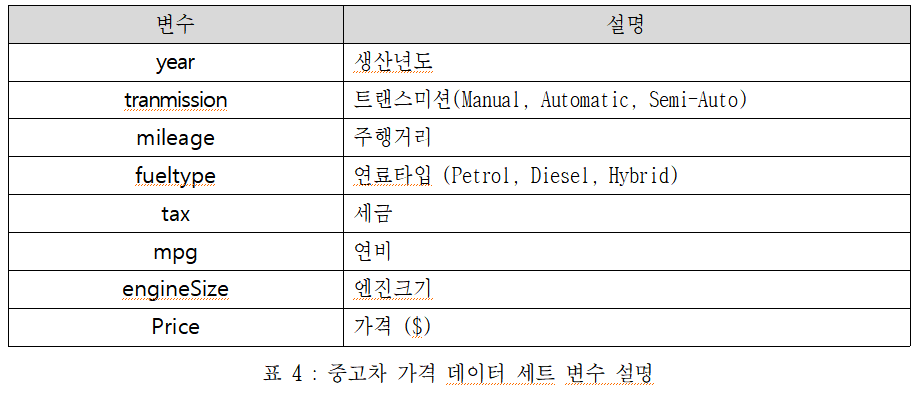

> (1) 다중회귀분석 모형의 결정계수를 구하시오. <br>
> (2) 독립변수 중 회귀계수가 가장 큰 변수와 값을 구하여 튜플 타입으로 출력하시오. <br> (ex. ('Weight', 0.09003569454430438) )   <br>
> (3) 독립변수 중 p-value가 가장 낮은 변수와 값을  구하여 튜플 타입으로 출력하시오.

#### 632-01 데이터 불러오기

In [ ]:
#library 임포트
import pandas as pd
import statsmodels.api as sm

In [ ]:
#file 읽어오기
file = path + '07.03.02-used_car_price_dataset.csv'
df = pd.read_csv(file)
print(df.head())

   year  price transmission  mileage fuelType  tax   mpg  engineSize
0  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4  2019  17300       Manual     1998   Petrol  145  49.6         1.0


#### 632-02 카테고리 라벨 인코딩

In [ ]:
df.columns

Index(['Mileage', 'Weight', 'Length', 'Width', 'Cylinders', 'Acceleration',
       'UsageKm', 'Price'],
      dtype='object')

In [ ]:
#카테고리 밸류 라벨인코딩
df['fuelType'] = df['fuelType'].map({'Petrol':0, 'Diesel':1, 'Hybrid':2})
df['transmission'] = df['transmission'].map({'Manual':0, 'Automatic':1, 'Semi-Auto':2})
#print(df.head())

#### 632-03 변수 설정 및 데이터 분리

In [ ]:
#독립변수와 종속변수 설정
X_cols = ['year',  'transmission',  'mileage', 'fuelType',  'tax', 'mpg', 'engineSize']
Y_cols = ['price']


In [ ]:
#독립변수, 종속변수 데이터 분리
X = df[X_cols]
y = df[Y_cols]

print(X.head())

   year  transmission  mileage  fuelType  tax   mpg  engineSize
0  2017             0    15735         0  150  55.4         1.4
1  2016             1    36203         1   20  64.2         2.0
2  2016             0    29946         0   30  55.4         1.4
3  2017             1    25952         1  145  67.3         2.0
4  2019             0     1998         0  145  49.6         1.0


####632-04 다중회귀분석 모델 만들기

In [ ]:
#다중회귀 분석 수행
X = sm.add_constant(X) #상수항 추가
model = sm.OLS(y, X).fit() #분석 수행 - 모델 생성

print(model)

In [ ]:
#결과 요약
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Gender   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     392.6
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          8.18e-103
Time:                        05:15:17   Log-Likelihood:                 23.075
No. Observations:                 300   AIC:                            -38.15
Df Residuals:                     296   BIC:                            -23.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2643      0.228    -27.448      0.0

#### 632-05 결정 계수 구하기

In [ ]:
#결정계수 구하기

r_squared = model.rsquared

print(r_squared)

0.796102863798257


#### 632-06 회귀 계수가 가장 큰 변수와 값을 구하기

In [ ]:
# 회귀계수 중 가장 큰 값 구하기
# 회귀계수 - 각 독립변수가 종속변수에 미치는 영향력
coefs = model.params
#print(coefs)
max_coef = coefs.idxmax(), coefs.max()

print(max_coef )

('engineSize', 13051.486542147013)


#### 632-07 p-value가 가장 낮은 변수와 값을 구하기

In [ ]:
#p-value가 가장 낮은 변수와 값을 구하기
#p-value - 변수의 통계적 유의성을 나타냄

pvalues = model.pvalues
#print(type(pvalues))

min_pvalue = pvalues.idxmin(), pvalues.min()
print(min_pvalue)

('engineSize', 0.0)


In [ ]:
#전체 코드
#library 임포트
import pandas as pd
import statsmodels.api as sm

#file 읽어오기
file = path + '07.03.02-used_car_price_dataset.csv'
df = pd.read_csv(file)
#print(df.head())

#카테고리 밸류 라벨인코딩
df['fuelType'] = df['fuelType'].map({'Petrol':0, 'Diesel':1, 'Hybrid':2})
df['transmission'] = df['transmission'].map({'Manual':0, 'Automatic':1, 'Semi-Auto':2})
#print(df.head())

#독립변수와 종속변수 설정
X_cols = ['year',  'transmission',  'mileage', 'fuelType',  'tax', 'mpg', 'engineSize'] #'Mileage', 'Weight', 'Length', 'Width', 'Cylinders', 'Acceleration','UsageKm']
Y_cols = ['price']


#독립변수, 종속변수 데이터 분리
X = df[X_cols]
y = df[Y_cols]

#print(X.head())

#다중회귀 분석 수행
X = sm.add_constant(X) #상수항 추가
model = sm.OLS(y, X).fit() #분석 수행 - 모델 생성

#print(model)

#결과 요약
#model.summary()

#결정계수 구하기
r_squared = model.rsquared

print(r_squared)


# 회귀계수 중 가장 큰 값 구하기
# 회귀계수 - 각 독립변수가 종속변수에 미치는 영향력
coefs = model.params
#print(coefs)
max_coef = coefs.idxmax(), coefs.max()

print(max_coef )

#p-value가 가장 낮은 변수와 값을 구하기
#p-value - 변수의 통계적 유의성을 나타냄

pvalues = model.pvalues
#print(pvalues)

min_pvalue = pvalues.idxmin(), pvalues.min()
print(min_pvalue)

0.796102863798257
('engineSize', 13051.486542147013)
('engineSize', 0.0)
